In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls -la "/content/gdrive/My Drive/darknet"

total 28
drwx------ 2 root root 4096 Sep 29 18:16 backup
drwx------ 2 root root 4096 Sep 28 11:43 bean
drwx------ 2 root root 4096 Sep 28 13:05 bin
drwx------ 2 root root 4096 Sep 28 13:46 cfg
drwx------ 2 root root 4096 Sep 28 10:59 cuDNN
drwx------ 3 root root 4096 Sep 28 14:17 data
drwx------ 2 root root 4096 Sep 28 13:22 weights


In [ ]:
import os
if not os.path.exists('/usr/local/cuda/include/cudnn.h'):
    !tar -xzvf /content/gdrive/MyDrive/darknet/cuDNN/cudnn-11.1-linux-aarch64sbsa-v8.0.5.39.tgz -C /usr/local/
    !chmod a+r /usr/local/cuda/include/cudnn.h
    
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

In [ ]:
import os
if not os.path.exists('darknet'):
    os.makedirs('darknet')
%cd darknet
%ls

[Errno 20] Not a directory: 'darknet'
/content/darknet
backup/   bean/  chart.png  data/            weights/
bad.list  cfg/   darknet*   predictions.jpg


In [ ]:
!ls -la '/content/gdrive/My Drive/darknet/bin/darknet'

!cp /content/gdrive/My\ Drive/darknet/bin/darknet ./darknet

!chmod +x ./darknet

-rw------- 1 root root 3213624 Sep 28 13:55 '/content/gdrive/My Drive/darknet/bin/darknet'


In [ ]:
!cp -r '/content/gdrive/My Drive/darknet/weights' .
!cp -r '/content/gdrive/My Drive/darknet/cfg' .
!cp -ar '/content/gdrive/My Drive/darknet/data' .
%ls

backup/   bean/  chart.png  data/            weights/
bad.list  cfg/   darknet*   predictions.jpg


In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

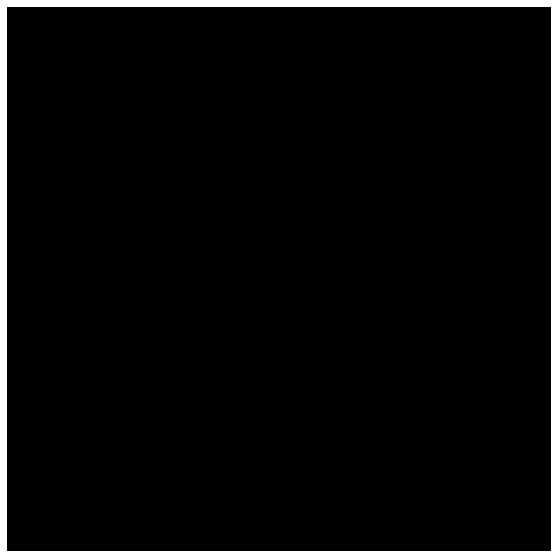

In [ ]:
!./darknet detect cfg/yolov3.cfg weights/yolov3.weights /data/dog.jpg
imShow('predictions.jpg')
#download('predictions.jpg')

In [ ]:
!cp -r "/content/gdrive/My Drive/darknet/bean" .

In [ ]:
!./darknet detector train bean/bean_data.data bean/bean-train-yolo.cfg weights/darknet53.conv.74 -dont_show 

bean-train-yolo
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128

In [ ]:
!./darknet detector map bean/bean_data.data bean/bean-train-yolo.cfg backup/bean-train-yolo_1000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

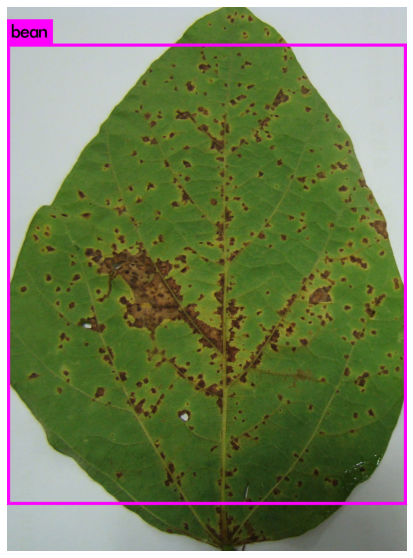

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!./darknet detector test bean/bean_data.data bean/bean-train-yolo.cfg backup/bean-train-yolo_1000.weights data/bean2.jpg -dont-show

imShow('predictions.jpg')
download('predictions.jpg')

In [ ]:
if os.path.exists('./backup'):
    !cp -r ./backup "/content/gdrive/My Drive/darknet"  

if not os.path.exists('./backup'):
    os.makedirs('./backup')
    !cp -r "/content/gdrive/My Drive/darknet/backup/apple-train-yolo_final.weights" ./backup

In [ ]:
!ls -al ./backup